In [1]:
from Cluster import Clustering

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

## Example for one campaign

c:\Users\Shania\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_agglomerative.py:323: UserWarning: the number of connected components of the connectivity matrix is 3 > 1. Completing it to avoid stopping the tree early.
  connectivity, n_connected_components = _fix_connectivity(
c:\Users\Shania\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_agglomerative.py:323: UserWarning: the number of connected components of the connectivity matrix is 3 > 1. Completing it to avoid stopping the tree early.
  connectivity, n_connected_components = _fix_connectivity(


PD subgroup 1 is contained by PD group  {1}
PD subgroup 2 is contained by PD group  {1}
PD subgroup 3 is contained by PD group  {0}
PD subgroup 4 is contained by PD group  {0}
LP subgroup 1 is contained by LP group  {0}
LP subgroup 2 is contained by LP group  {0}
LP subgroup 3 is contained by LP group  {0}
LP subgroup 4 is contained by LP group  {1}


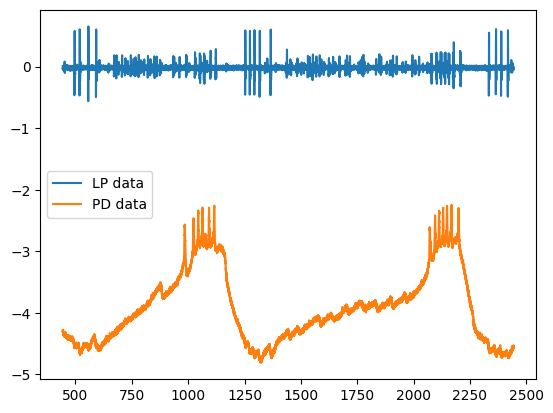

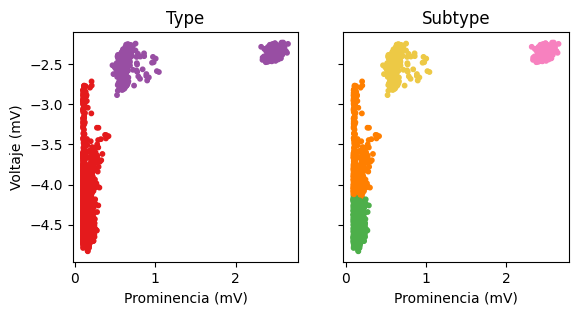

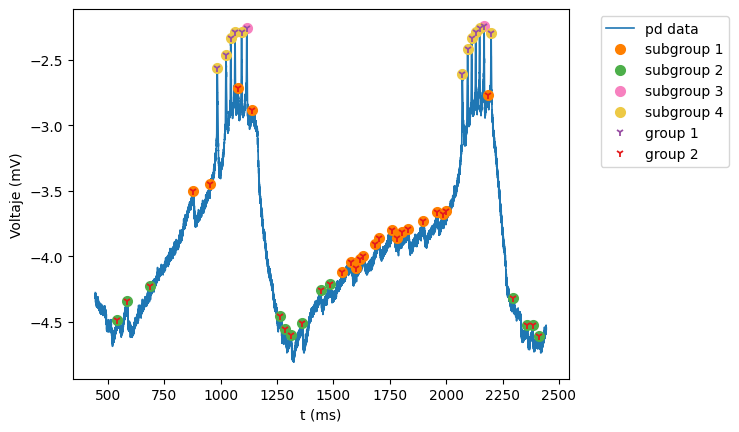

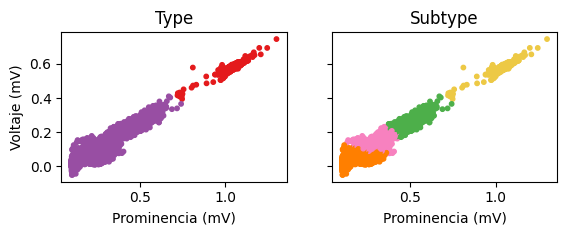

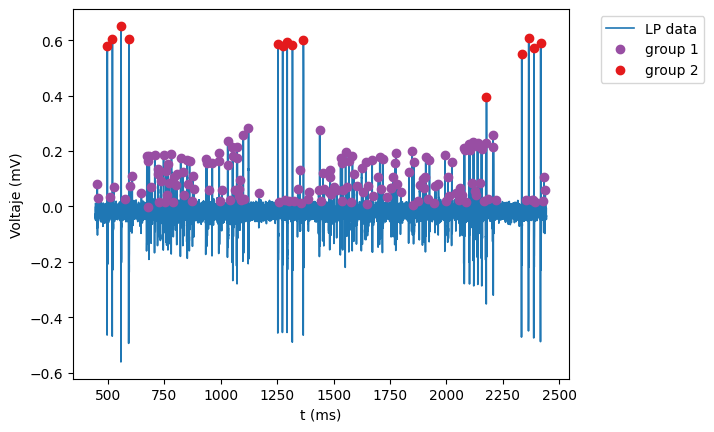

In [3]:
Data = '../robot/txt/sub1.txt'


x_cut = 444

spike_idx_LP, spike_variables_LP, spike_idx_PD, spike_variables_PD = Clustering(Data, x_cut, x_min=0, x_max=20000)

In [82]:
# PD first: we choose the start time from graphics above
t_cut = 444
first_neuron = 'PD'

prominence_LP_1 = 0.45
prominence_LP_2 = 4
height_LP = 0.3
prominence_PD_1 = 0.25
prominence_PD_2 = 4
height_PD = -4
dist_LP = 985*t_cut
dist_PD = 5000*t_cut

t, V_PD, V_LP, slices_PD, slices_LP, Intervals = Get_Intervals(Data, t_cut, first_neuron,prominence_LP_1, prominence_LP_2, prominence_PD_1, prominence_PD_2,height_LP, height_PD, dist_LP, dist_PD)

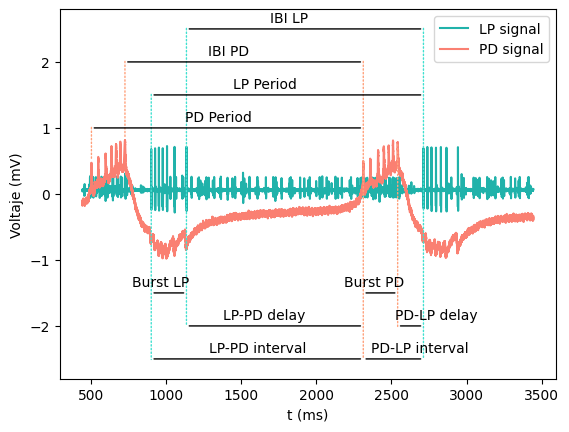

In [83]:
Plot_All_Intervals(t, V_PD, V_LP, slices_PD, slices_LP, x_min=0, x_max = 30000)

c:\Users\Dell\Documents\GitHub\TFM\TFM\Definitivo\Interval_Pairplot.py:88: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0,0].set(yticklabels=axes[0,1].get_yticklabels())


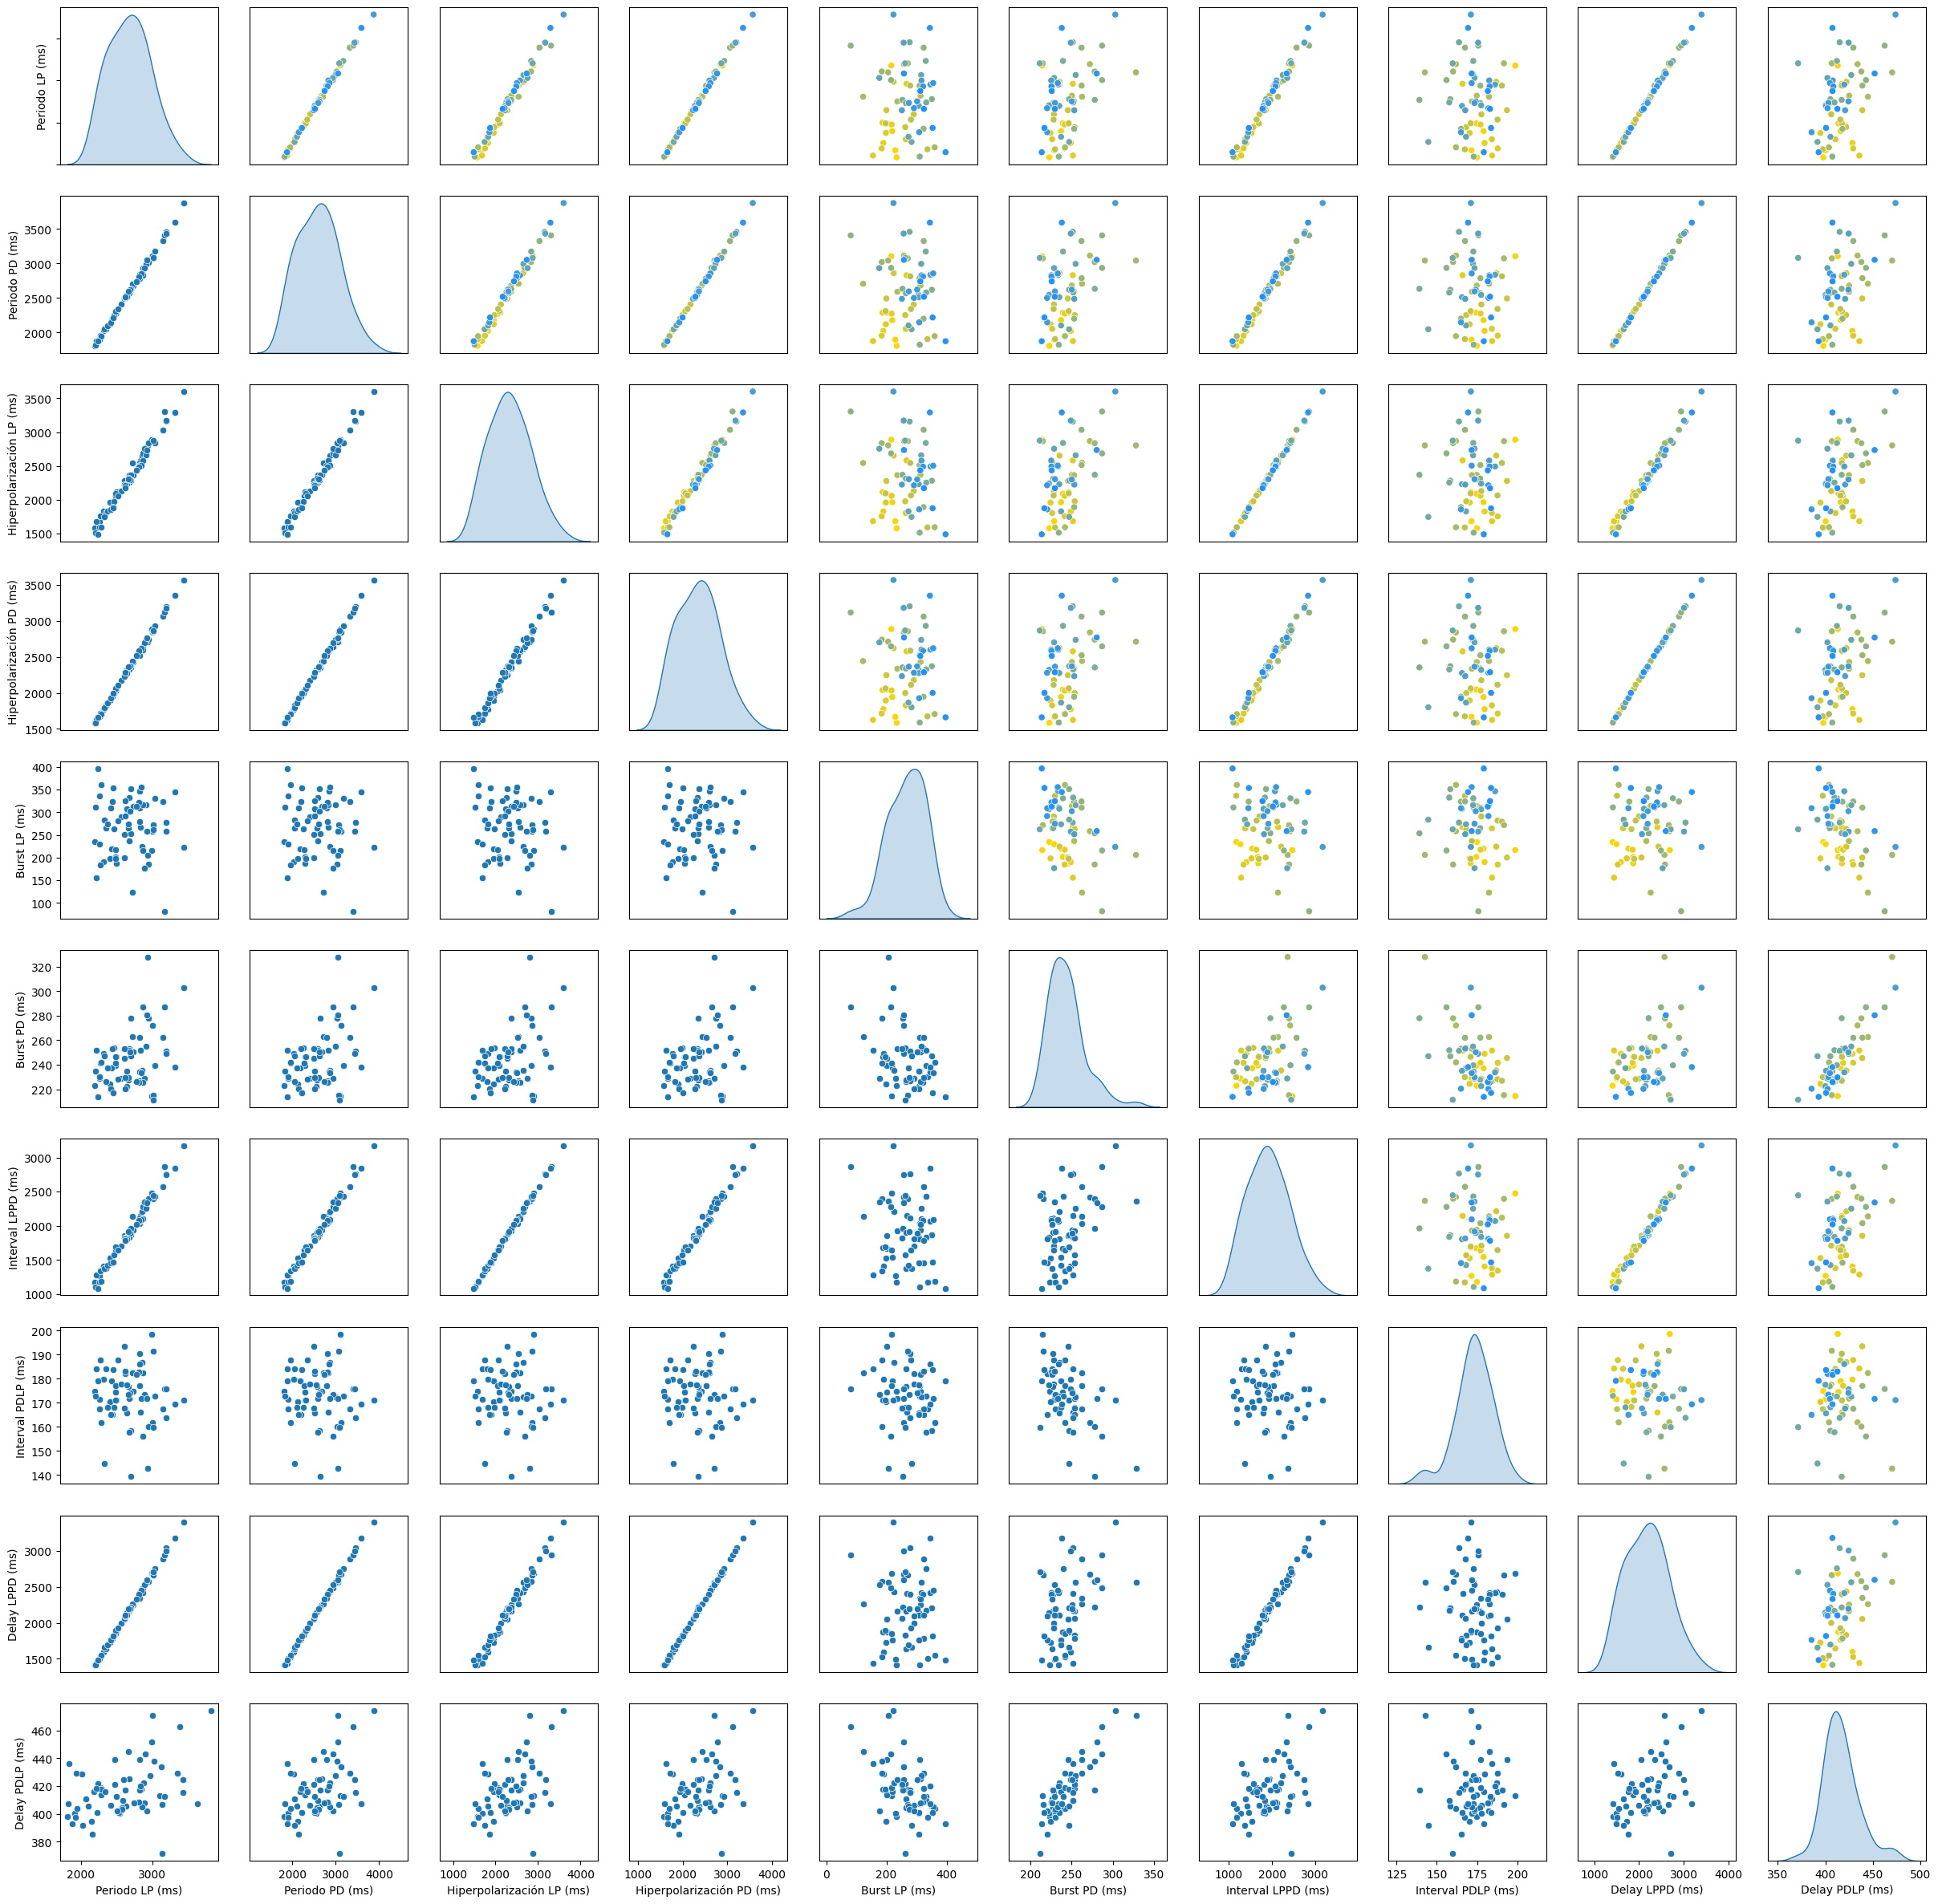

In [84]:
Interval_Pairplot(Intervals, diagonal_kind='kde', Evolution=True, Palette="blend:gold,dodgerblue", Cycle_by_cycle=True, hue="Normal")

In [39]:
results = Get_Slopes(Intervals)
results

Dataset     Slope   Intercept  \
0                       Periodo PD + Periodo LP  0.992656   43.742299   
1             Hiperpolarización LP + Periodo LP  0.993290  312.018309   
2             Hiperpolarización PD + Periodo LP  0.991101  285.113295   
3                    Interval LPPD + Periodo LP  0.987420  314.057260   
4                       Delay LPPD + Periodo LP  0.994081    3.734455   
5             Hiperpolarización LP + Periodo PD  1.000218  272.550982   
6             Hiperpolarización PD + Periodo PD  0.998358  243.571067   
7                    Interval LPPD + Periodo PD  0.994656  272.697155   
8                       Delay LPPD + Periodo PD  1.001123  -38.501790   
9   Hiperpolarización PD + Hiperpolarización LP  0.997777  -26.980981   
10         Interval LPPD + Hiperpolarización LP  0.994105    1.972471   
11            Delay LPPD + Hiperpolarización LP  1.000290 -307.453044   
12         Interval LPPD + Hiperpolarización PD  0.996308   29.083935   
13            Delay LPPD + Hiperpolarización PD  1.002528 -281.148812   
14                     Interval PDLP + Burst LP -0.999772    8.930347   
15                   Delay LPPD + Interval LPPD  1.006209 -311.187499   

         R^2  Linear?  
0   0.999333     True  
1   0.999476     True  
2   0.999225     True  
3   0.999136     True  
4   0.999685     True  
5   0.999302     True  
6   0.999740     True  
7   0.999662     True  
8   0.999726     True  
9   0.999710     True  
10  0.999690     True  
11  0.999197     True  
12  0.999955     True  
13  0.999505     True  
14  0.895468     True  
15  0.999482     True

## Other campaigns

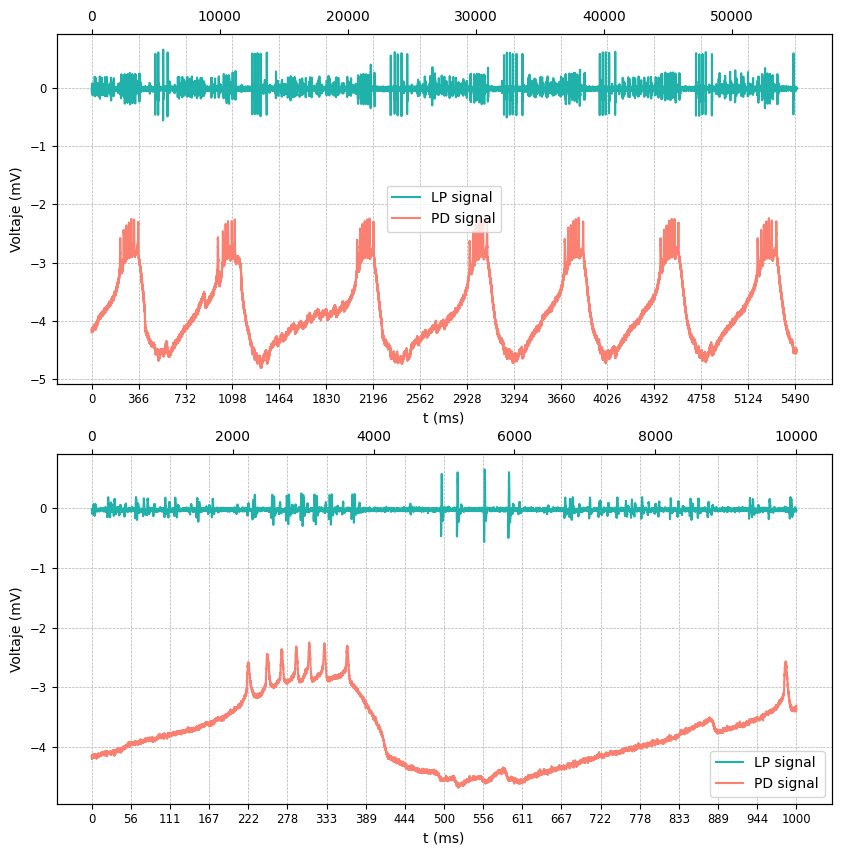

In [4]:
Data = '../robot/txt/sub1.txt'
Plot_Data(Data)

In [5]:
first_neuron = 'PD'

parameters = {"sub1.txt": [0.25, 4, 0.35, 0.25, 4, -3.1, 300, 300, 470, 167],
        "sub4.txt": [0.15, 4, 0.25, 0.15, 4, -4.1, 300, 300, 500, 278],
        "sub5.txt": [0.2, 4, 0.2, 0.1, 4, 4.3, 400, 400, 400, 222],
        "sub6.txt": [0.05, 4, 0.05, 0.25, 4, -3.5, 400, 400, 889, 556],
        "sub8.txt": [0.145, 4, 0.06, 0.25, 4, -3.5, 500, 1000, 778, 389],
        "sub10.txt": [0.5, 4, 0.6, 0.75, 4, 2.75, 1000, 1000, 500, 167],
        "sub12.txt": [0.2, 4, 0.25, 0.5, 4, -1.5, 1000, 1000, 1467, 367],
        "sub13.txt": [0.4, 4, 0.41, 0.4, 4, 1.75, 700, 1000, 389, 111],
        "sub14.txt": [0.3, 4, 0.4, 0.25, 4, -4, 1000, 1000, 833, 367],
        "sub15.txt": [0.1, 4, 0.12, 0.25, 4, -4.3, 1300, 5000, 222, 1],
        "sub16.txt": [0.45, 4, 0.3, 0.25, 4, -4, 985, 5000, 833, 444]}

campaign = parameters[Data[13:]]

if first_neuron=='PD':
        t_cut = campaign[-1]
elif first_neuron=='LP':
        t_cut = campaign[-2]

prominence_LP_1 = campaign[0]
prominence_LP_2 = campaign[1]
height_LP = campaign[2]
prominence_PD_1 = campaign[3]
prominence_PD_2 = campaign[4]
height_PD = campaign[5]
dist_LP = campaign[6]*t_cut
dist_PD = campaign[7]*t_cut

t, V_PD, V_LP, slices_PD, slices_LP, Intervals = Get_Intervals(Data, t_cut, first_neuron,prominence_LP_1, prominence_LP_2, prominence_PD_1, prominence_PD_2,height_LP, height_PD, dist_LP, dist_PD)

#"sub7.txt": [0.07, 4, 0, 0.5, 4, -3, 500, 400, 32000, 31000],

c:\Users\Shania\Documents\GitHub\TFM\Definitivo\Interval_Pairplot.py:88: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0,0].set(yticklabels=axes[0,1].get_yticklabels())
c:\Users\Shania\Documents\GitHub\TFM\Definitivo\Interval_Pairplot.py:88: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0,0].set(yticklabels=axes[0,1].get_yticklabels())
c:\Users\Shania\Documents\GitHub\TFM\Definitivo\Interval_Pairplot.py:88: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0,0].set(yticklabels=axes[0,1].get_yticklabels())
c:\Users\Shania\Documents\GitHub\TFM\Definitivo\Interval_Pairplot.py:88: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0,0].set(yticklabe

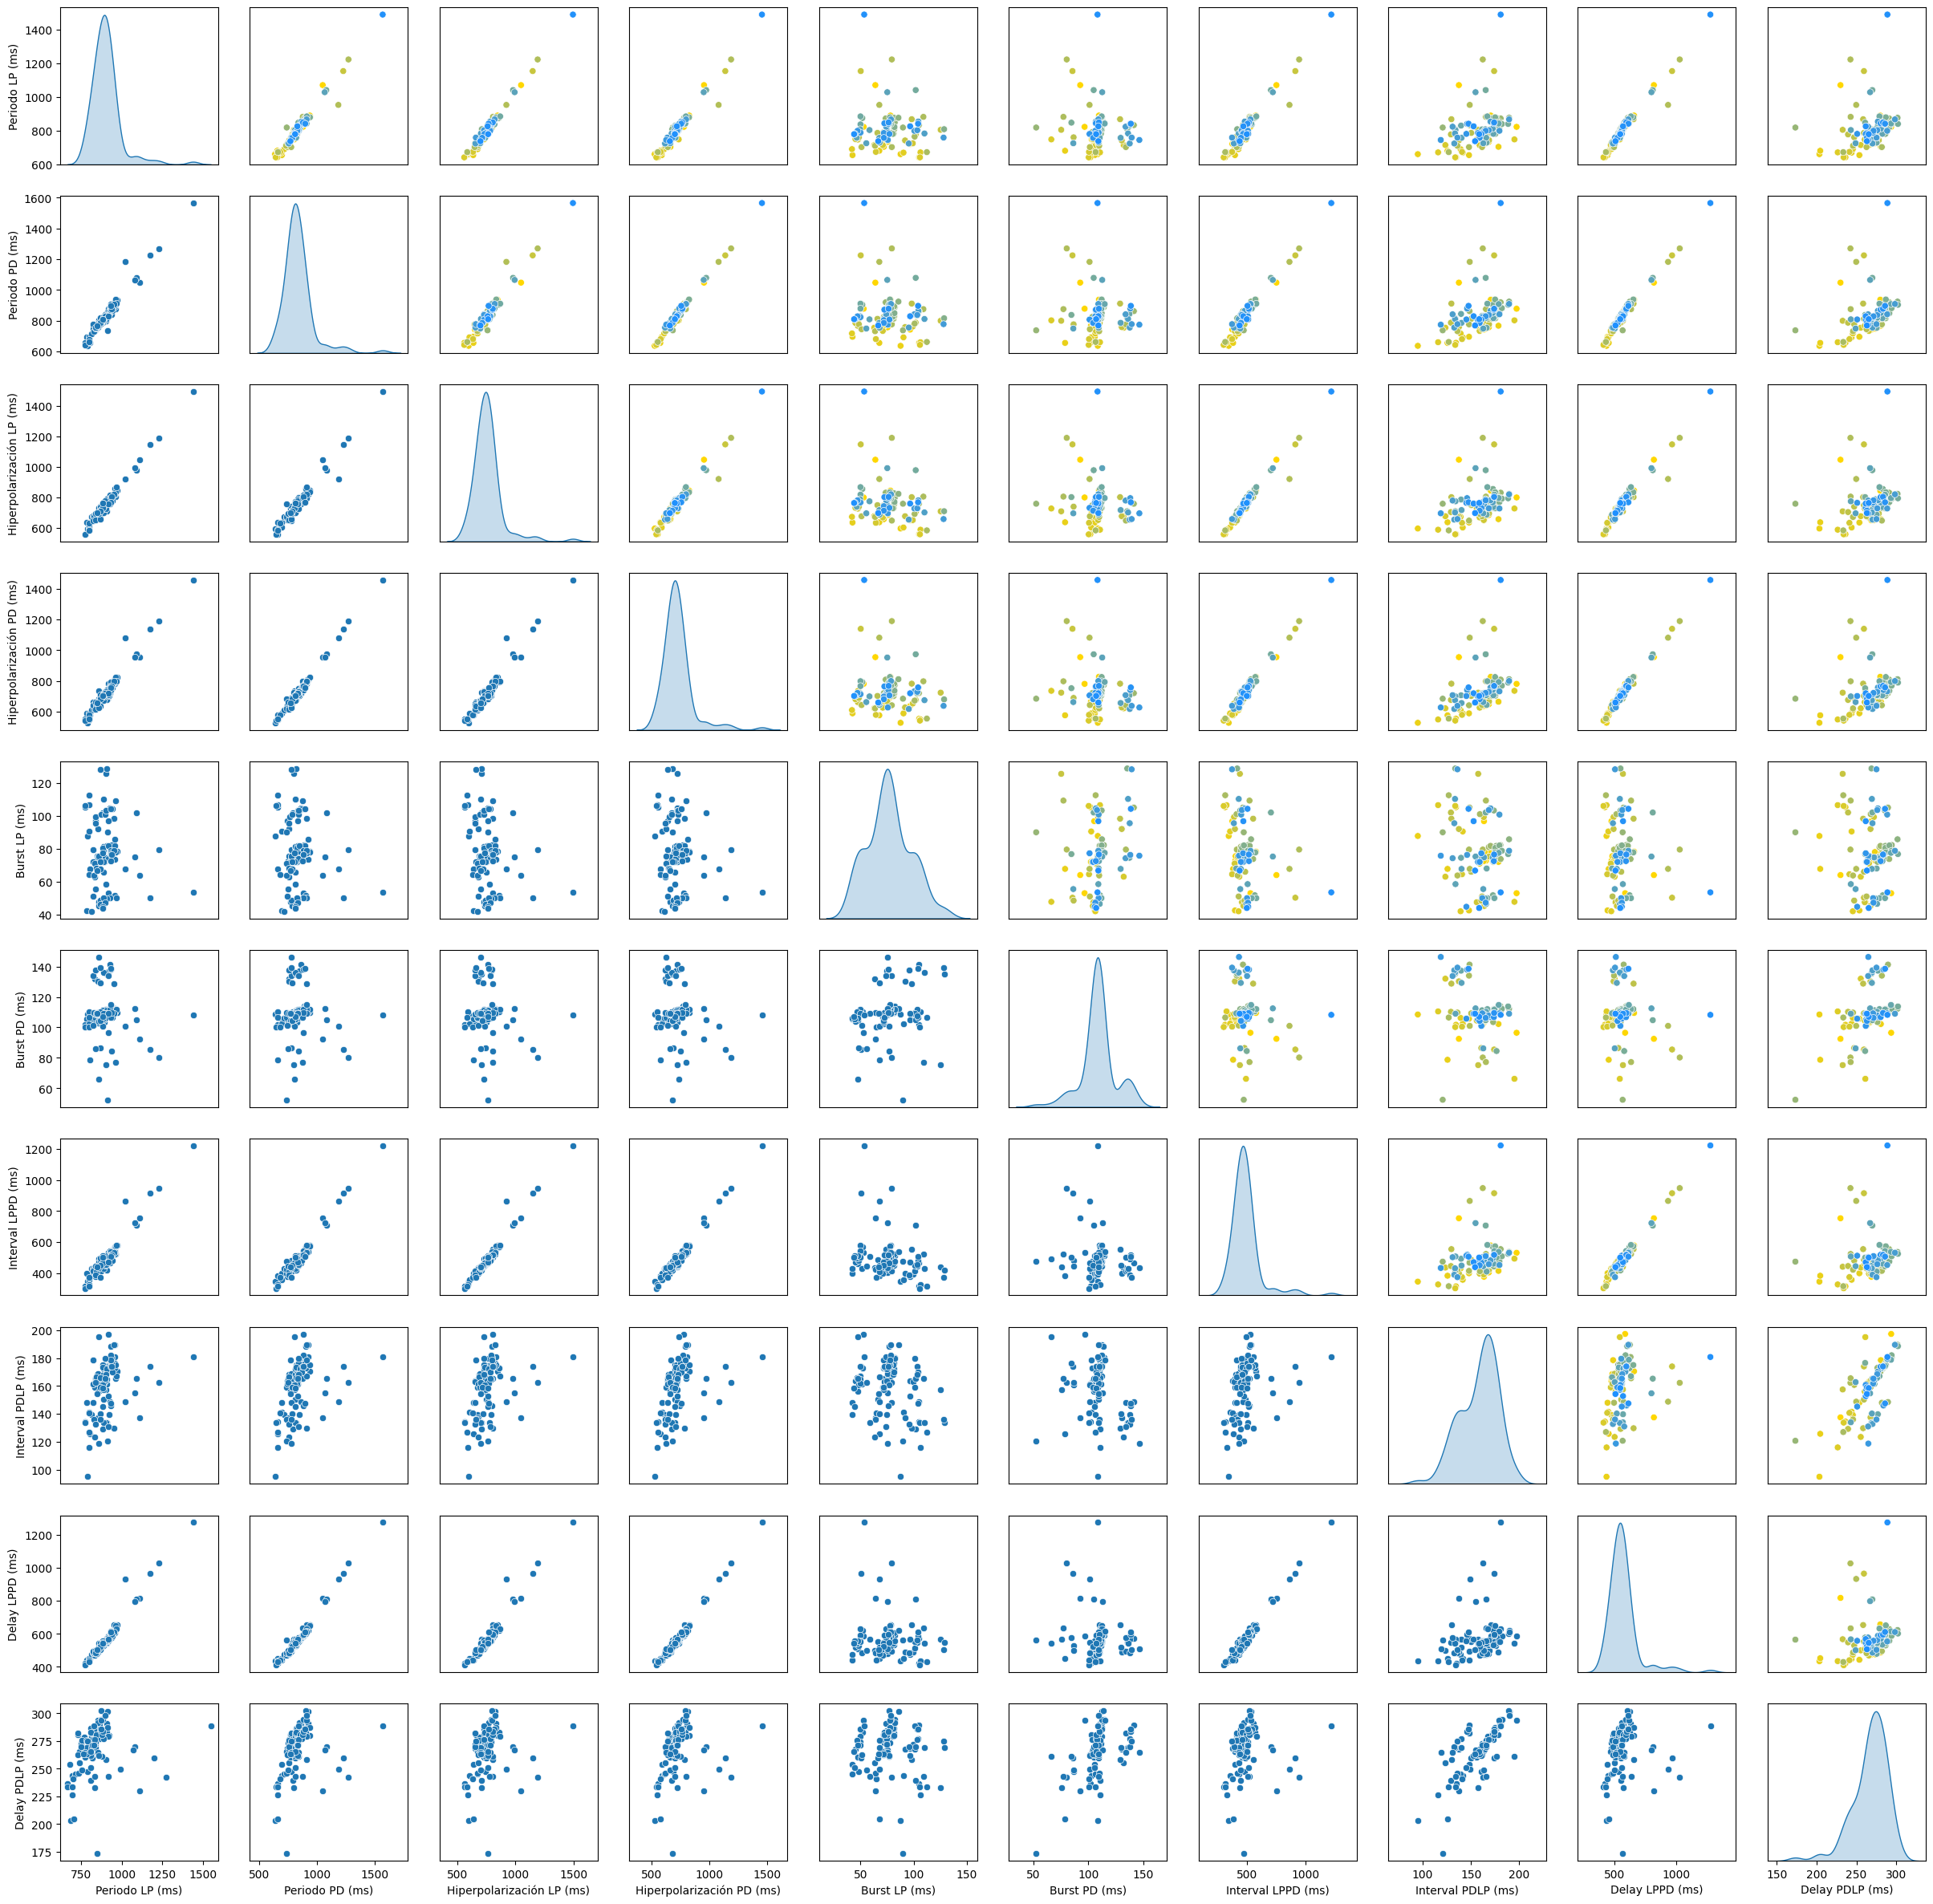

In [6]:
Interval_Pairplot(Intervals, diagonal_kind='kde', Evolution=True, Palette="blend:gold,dodgerblue", Cycle_by_cycle=True, hue="Normal")

## Slope comparison 

sub1.txt
sub6.txt
sub10.txt
sub12.txt
sub14.txt
sub15.txt
sub16bueno.txt


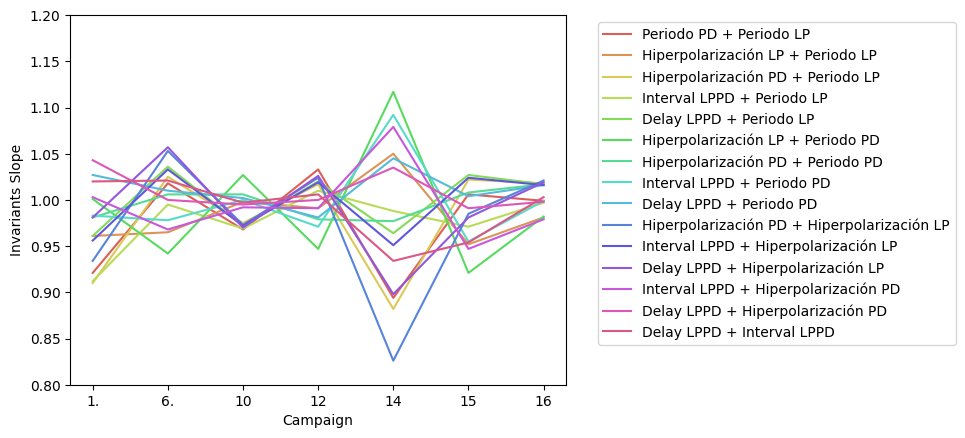

In [2]:
# List of parameters for each campaign [prominence_LP_1, prominence_LP_2, height_LP, prominence_PD_1, prominence_PD_2, height_PD, dist_LP, dist_PD, t_cut_LP, t_cut_PD]

parameters = {"sub1.txt": [0.25, 4, 0.35, 0.25, 4, -3.1, 300, 300, 470, 167],
        #"sub4.txt": [0.15, 4, 0.25, 0.15, 4, -4.1, 300, 300, 500, 278],
        "sub6.txt": [0.05, 4, 0.05, 0.25, 4, -3.5, 400, 400, 889, 556],
        #"sub8.txt": [0.145, 4, 0.06, 0.25, 4, -3.5, 500, 1000, 778, 389],
        "sub10.txt": [0.5, 4, 0.6, 0.75, 4, 2.75, 1000, 1000, 500, 167],
        "sub12.txt": [0.2, 4, 0.25, 0.5, 4, -1.5, 1000, 1000, 1467, 367],
        #"sub13.txt": [0.4, 4, 0.41, 0.4, 4, 1.75, 700, 1000, 389, 111],
        "sub14.txt": [0.3, 4, 0.4, 0.25, 4, -4, 1000, 1000, 833, 367],
        "sub15.txt": [0.1, 4, 0.12, 0.25, 4, -4.3, 1300, 5000, 222, 1],
        "sub16.txt": [0.45, 4, 0.3, 0.25, 4, -4, 985, 5000, 833, 444]}


# Starting all of them with PD
first_neuron = 'PD'

dict = CompareSlopes(parameters, first_neuron)

In [3]:
pd.DataFrame(dict)

Periodo PD + Periodo LP  \
0  [0.921, 1.018, 0.968, 1.033, 0.894, 1.006, 0.999]   
1                                                  7   
2                       [1., 6., 10, 12, 14, 15, 16]   

                  Hiperpolarización LP + Periodo LP  \
0  [0.961, 0.965, 0.998, 0.991, 1.05, 0.952, 0.981]   
1                                                 7   
2                      [1., 6., 10, 12, 14, 15, 16]   

                  Hiperpolarización PD + Periodo LP  \
0  [0.91, 1.025, 0.975, 1.017, 0.882, 1.022, 1.018]   
1                                                 7   
2                      [1., 6., 10, 12, 14, 15, 16]   

                         Interval LPPD + Periodo LP  \
0  [0.912, 0.995, 0.969, 1.01, 0.988, 0.971, 0.997]   
1                                                 7   
2                      [1., 6., 10, 12, 14, 15, 16]   

                            Delay LPPD + Periodo LP  \
0  [0.961, 1.036, 0.972, 1.02, 0.964, 1.027, 1.017]   
1                                                 7   
2                      [1., 6., 10, 12, 14, 15, 16]   

                   Hiperpolarización LP + Periodo PD  \
0  [1.001, 0.942, 1.027, 0.947, 1.117, 0.921, 0.982]   
1                                                  7   
2                       [1., 6., 10, 12, 14, 15, 16]   

                   Hiperpolarización PD + Periodo PD  \
0  [0.981, 1.006, 1.006, 0.979, 0.977, 1.008, 1.017]   
1                                                  7   
2                       [1., 6., 10, 12, 14, 15, 16]   

                        Interval LPPD + Periodo PD  \
0  [0.983, 0.978, 1.0, 0.971, 1.092, 0.955, 0.999]   
1                                                7   
2                     [1., 6., 10, 12, 14, 15, 16]   

                            Delay LPPD + Periodo PD  \
0  [1.027, 1.01, 1.002, 0.981, 1.045, 1.004, 1.016]   
1                                                 7   
2                      [1., 6., 10, 12, 14, 15, 16]   

         Hiperpolarización PD + Hiperpolarización LP  \
0  [0.934, 1.053, 0.973, 1.024, 0.826, 0.985, 1.021]   
1                                                  7   
2                       [1., 6., 10, 12, 14, 15, 16]   

                Interval LPPD + Hiperpolarización LP  \
0  [0.956, 1.033, 0.972, 1.019, 0.951, 1.024, 1.016]   
1                                                  7   
2                       [1., 6., 10, 12, 14, 15, 16]   

                  Delay LPPD + Hiperpolarización LP  \
0  [0.981, 1.057, 0.97, 1.026, 0.898, 0.981, 1.019]   
1                                                 7   
2                      [1., 6., 10, 12, 14, 15, 16]   

                Interval LPPD + Hiperpolarización PD  \
0  [1.003, 0.968, 0.992, 0.991, 1.079, 0.947, 0.979]   
1                                                  7   
2                       [1., 6., 10, 12, 14, 15, 16]   

               Delay LPPD + Hiperpolarización PD  \
0  [1.043, 1.0, 0.995, 1.0, 1.035, 0.991, 0.998]   
1                                              7   
2                   [1., 6., 10, 12, 14, 15, 16]   

                         Delay LPPD + Interval LPPD  
0  [1.02, 1.021, 0.997, 1.006, 0.934, 0.954, 1.003]  
1                                                 7  
2                      [1., 6., 10, 12, 14, 15, 16]

## What about the campaigns we did not use?

They show some PD bursts significantly larger than others so that we could separate data in two clusters and analyze them individually:

In [38]:
parameters = {"sub4.txt": [0.15, 4, 0.25, 0.15, 4, -4.1, 300, 300, 500, 278],
        "sub8.txt": [0.145, 4, 0.06, 0.25, 4, -3.5, 500, 1000, 778, 389],
        "sub13.txt": [0.4, 4, 0.41, 0.4, 4, 1.75, 700, 1000, 389, 111]}

c:\Users\Shania\Documents\GitHub\TFM\Definitivo\Interval_Pairplot.py:91: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0,0].set(yticklabels=axes[0,1].get_yticklabels())
c:\Users\Shania\Documents\GitHub\TFM\Definitivo\Interval_Pairplot.py:91: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0,0].set(yticklabels=axes[0,1].get_yticklabels())
c:\Users\Shania\Documents\GitHub\TFM\Definitivo\Interval_Pairplot.py:91: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0,0].set(yticklabels=axes[0,1].get_yticklabels())
c:\Users\Shania\Documents\GitHub\TFM\Definitivo\Interval_Pairplot.py:91: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0,0].set(yticklabe

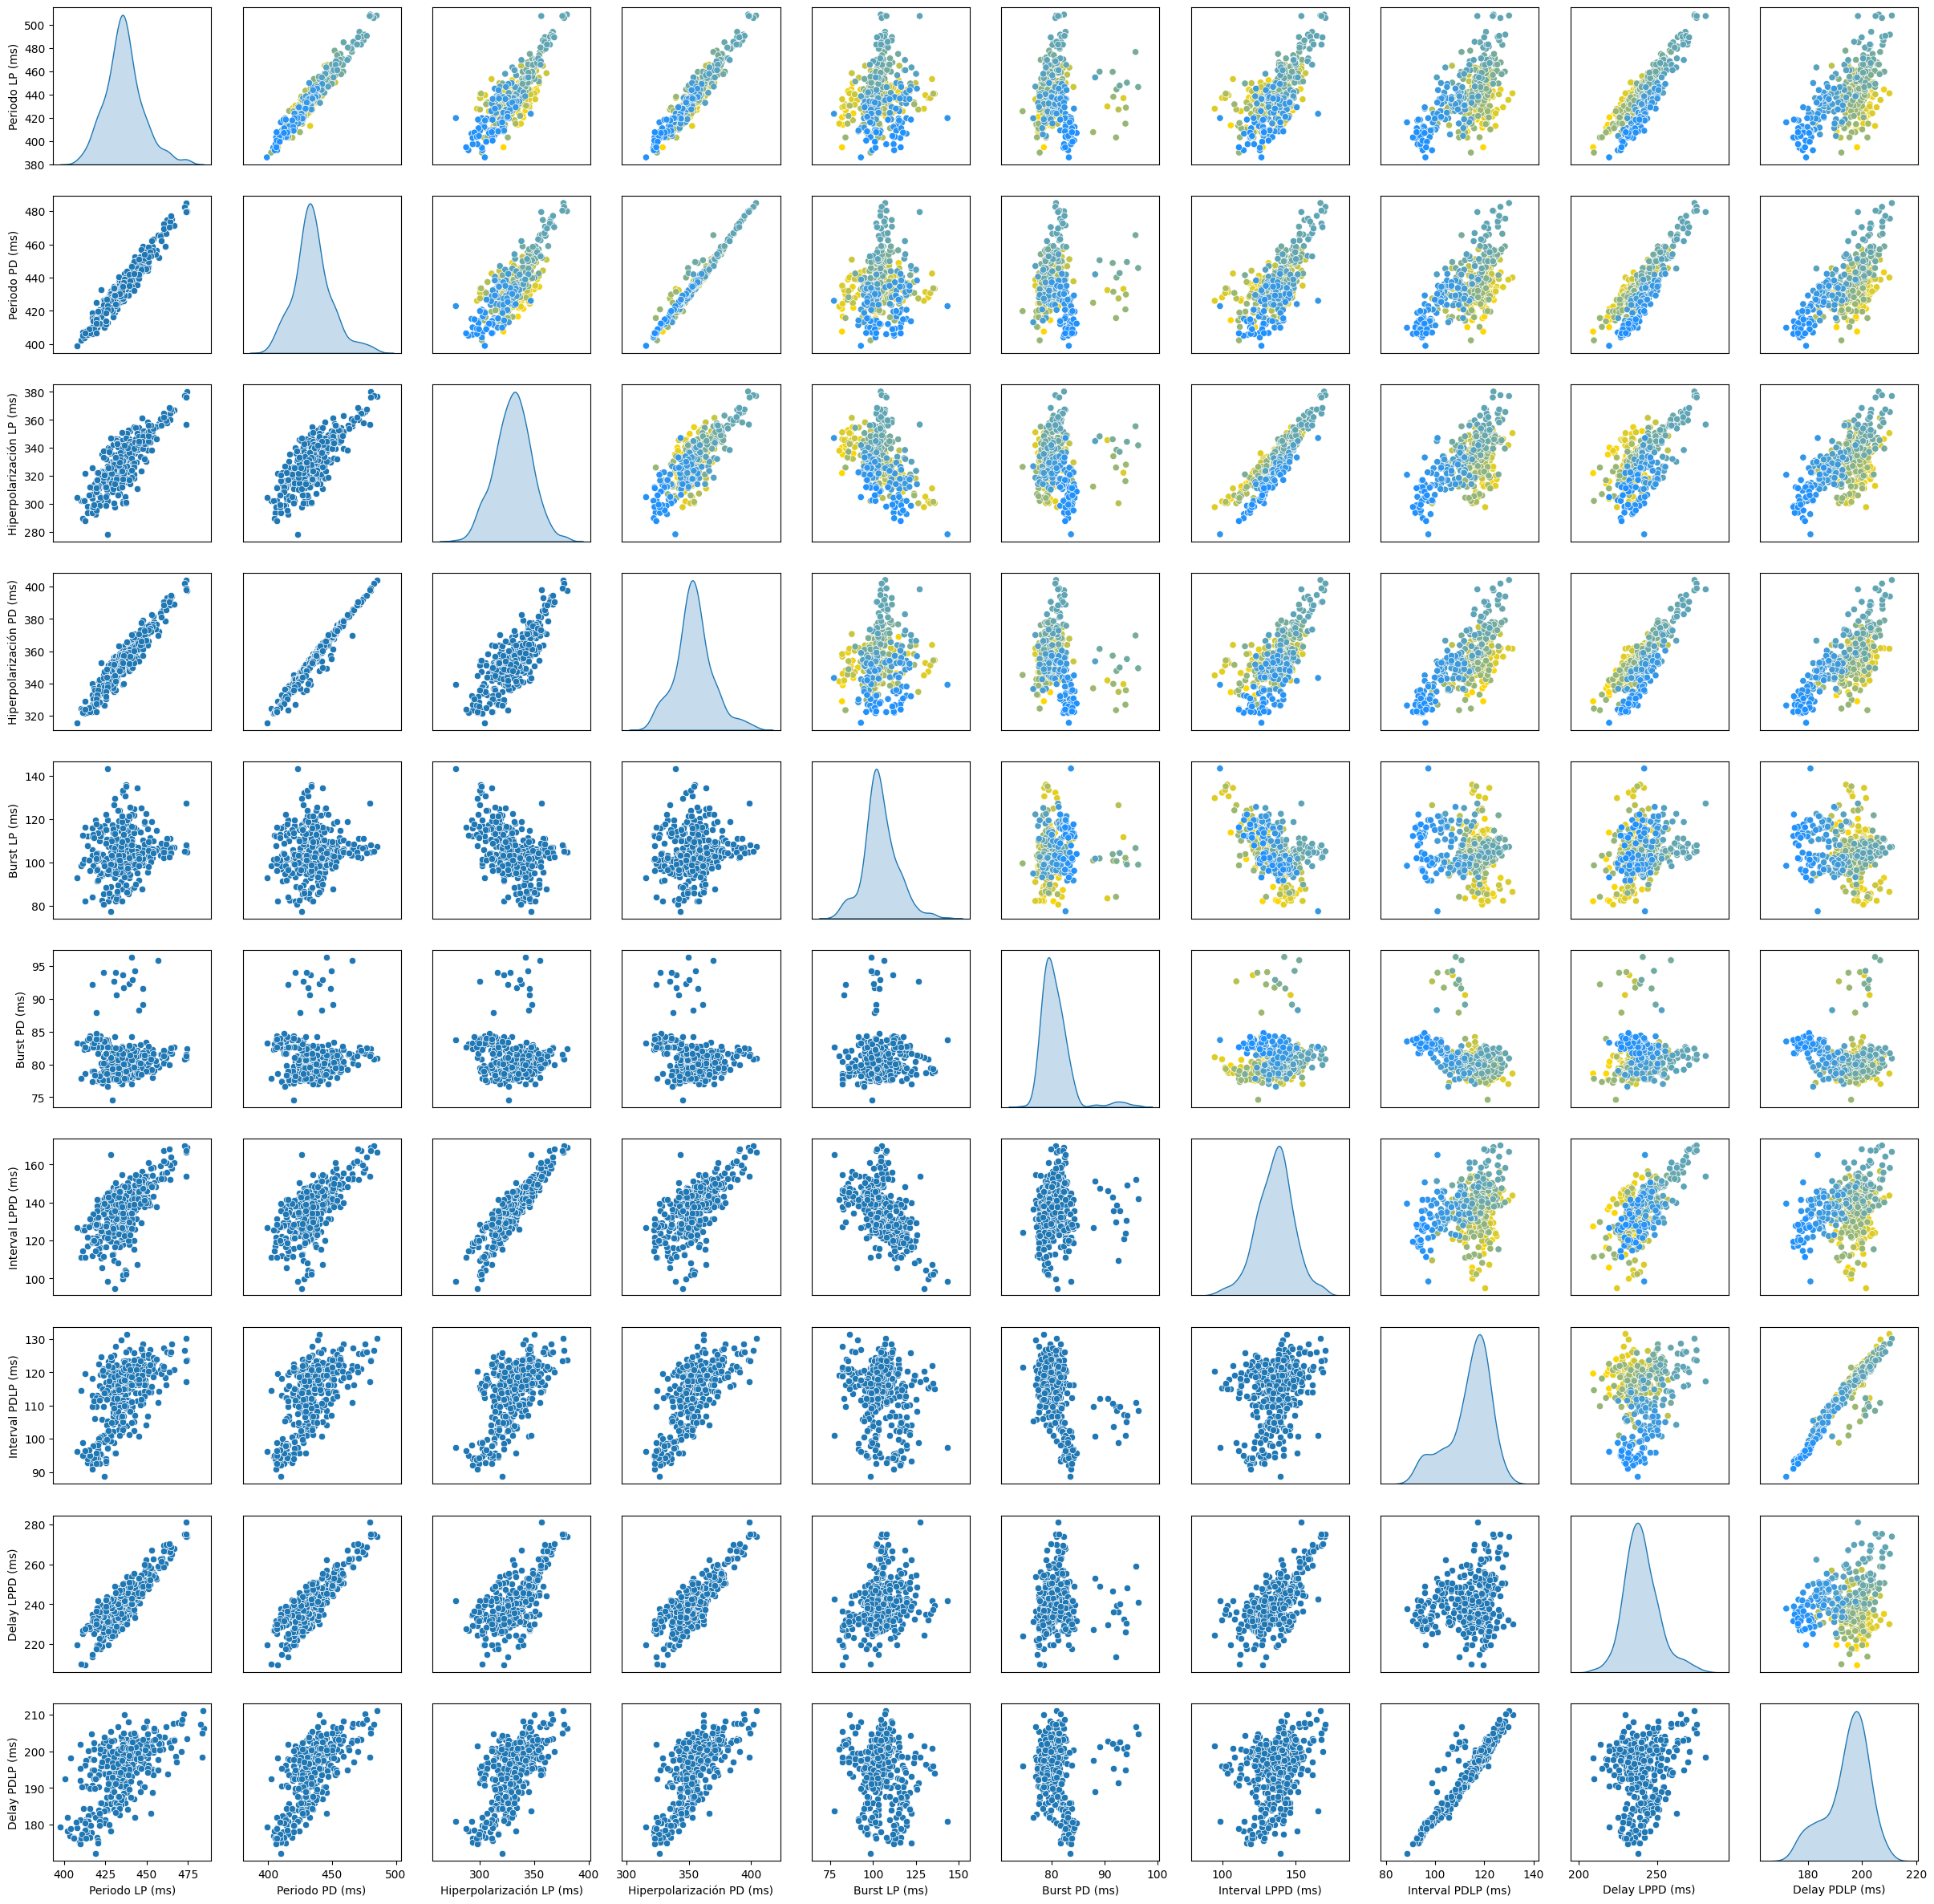

In [55]:
Data = '../robot/txt/sub4.txt'
first_neuron = 'PD'
campaign = parameters[Data[13:]]

if first_neuron=='PD':
        t_cut = campaign[-1]
elif first_neuron=='LP':
        t_cut = campaign[-2]

prominence_LP_1 = campaign[0]
prominence_LP_2 = campaign[1]
height_LP = campaign[2]
prominence_PD_1 = campaign[3]
prominence_PD_2 = campaign[4]
height_PD = campaign[5]
dist_LP = campaign[6]*t_cut
dist_PD = campaign[7]*t_cut

t, V_PD, V_LP, slices_PD, slices_LP, Intervals = Get_Intervals(Data, t_cut, first_neuron,prominence_LP_1, prominence_LP_2, prominence_PD_1, prominence_PD_2,height_LP, height_PD, dist_LP, dist_PD)
Interval_Pairplot(Intervals, diagonal_kind='kde', Evolution=True, Palette="blend:gold,dodgerblue", Cycle_by_cycle=True, hue="Normal")

c:\Users\Shania\Documents\GitHub\TFM\Definitivo\Interval_Pairplot.py:91: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0,0].set(yticklabels=axes[0,1].get_yticklabels())
c:\Users\Shania\Documents\GitHub\TFM\Definitivo\Interval_Pairplot.py:91: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0,0].set(yticklabels=axes[0,1].get_yticklabels())
c:\Users\Shania\Documents\GitHub\TFM\Definitivo\Interval_Pairplot.py:91: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0,0].set(yticklabels=axes[0,1].get_yticklabels())
c:\Users\Shania\Documents\GitHub\TFM\Definitivo\Interval_Pairplot.py:91: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0,0].set(yticklabe

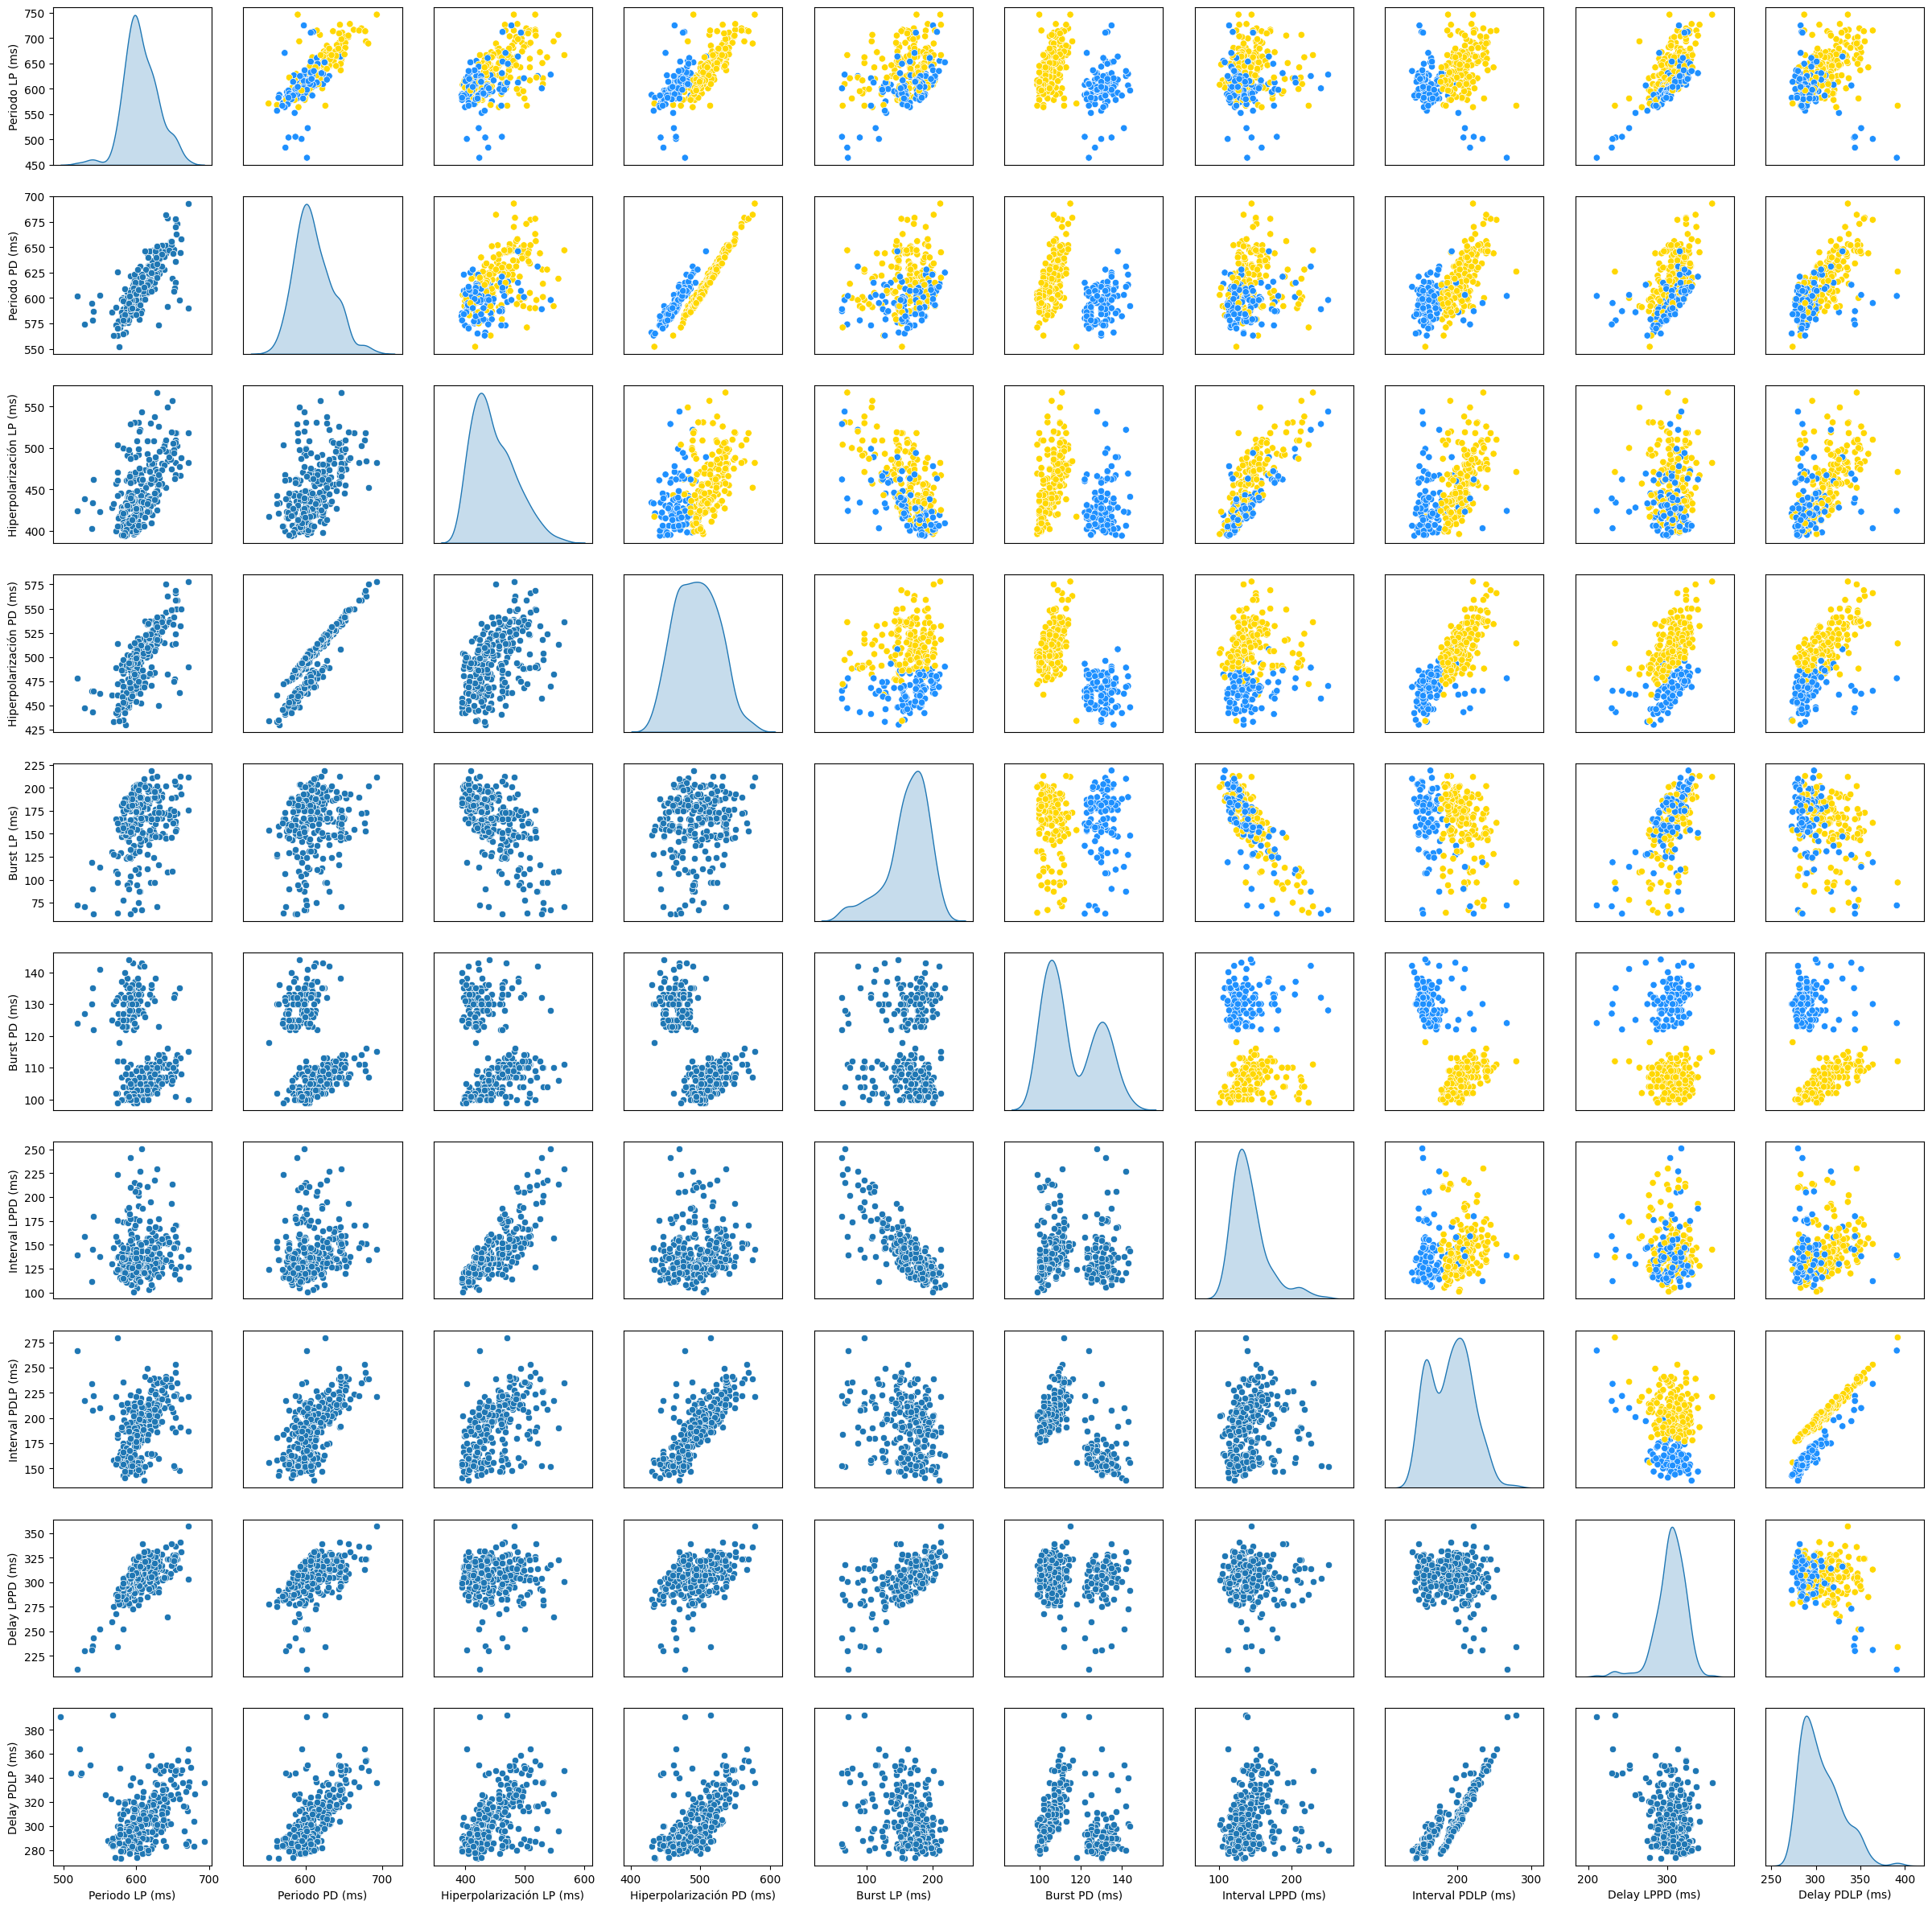

In [40]:
from sklearn.cluster import AgglomerativeClustering 
clustering = AgglomerativeClustering().fit(np.array(Intervals[:,5]).reshape(-1,1))
target = clustering.fit_predict(np.array(Intervals[:,5]).reshape(-1,1))
type(target)
Interval_Pairplot(Intervals, diagonal_kind='kde', Evolution=True, Palette="blend:gold,dodgerblue", Cycle_by_cycle=True, hue=target)

## Intervals Boxplot

{'whiskers': [<matplotlib.lines.Line2D at 0x233461913d0>,
 'caps': [<matplotlib.lines.Line2D at 0x23346191ca0>,
 'boxes': [<matplotlib.patches.PathPatch at 0x23346192450>,
 'medians': [<matplotlib.lines.Line2D at 0x23346190c20>,
 'fliers': [<matplotlib.lines.Line2D at 0x23346192e40>,
 'means': []}

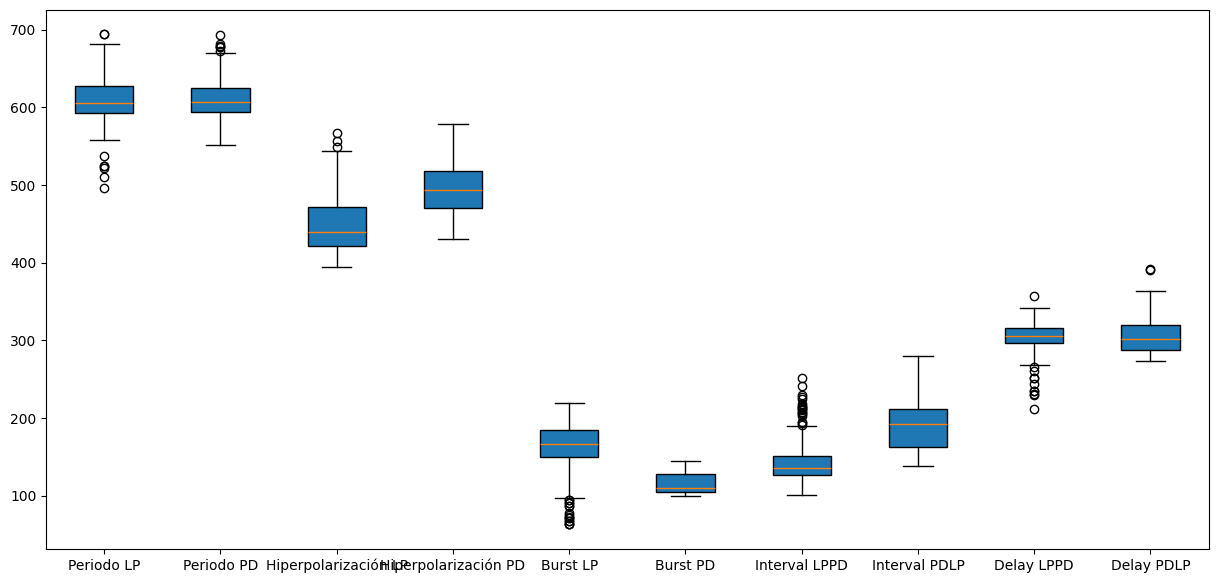

In [34]:
Labels = ["Periodo LP","Periodo PD","Hiperpolarización LP","Hiperpolarización PD","Burst LP","Burst PD","Interval LPPD","Interval PDLP","Delay LPPD","Delay PDLP"]

fig, axes = plt.subplots(figsize=(15, 7))
axes.boxplot(Intervals,patch_artist=True, labels=Labels)

sub1.txt
sub4.txt
sub6.txt
sub8.txt
sub10.txt
sub12.txt
sub13.txt
sub14.txt
sub15.txt
sub16.txt


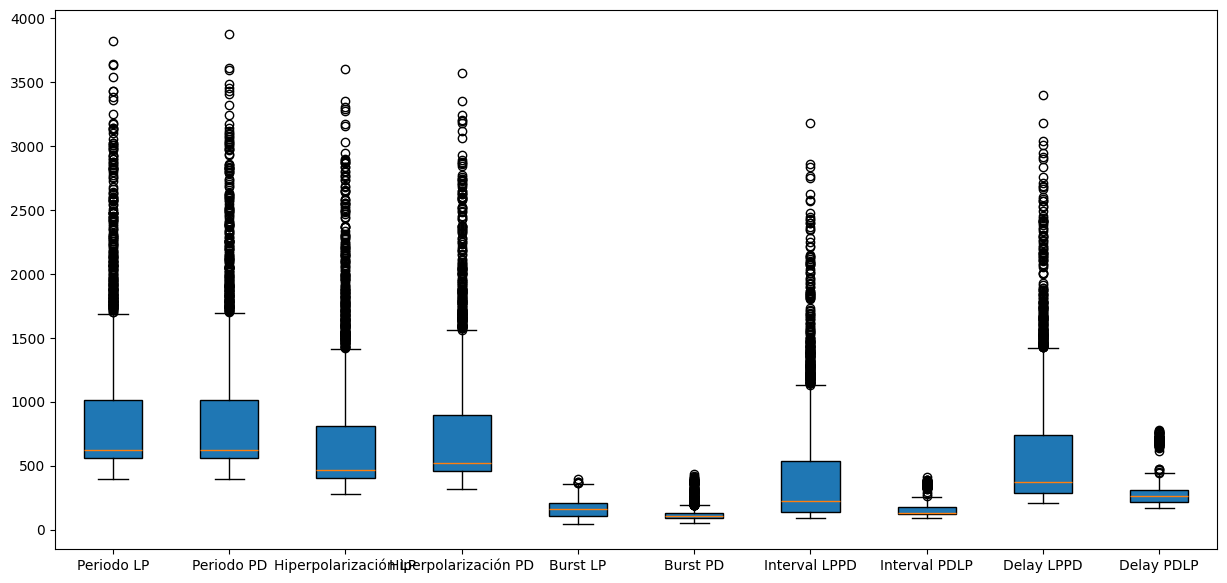

In [43]:
parameters = {"sub1.txt": [0.25, 4, 0.35, 0.25, 4, -3.1, 300, 300, 470, 167],
        "sub4.txt": [0.15, 4, 0.25, 0.15, 4, -4.1, 300, 300, 500, 278],
        "sub6.txt": [0.05, 4, 0.05, 0.25, 4, -3.5, 400, 400, 889, 556],
        "sub8.txt": [0.145, 4, 0.06, 0.25, 4, -3.5, 500, 1000, 778, 389],
        "sub10.txt": [0.5, 4, 0.6, 0.75, 4, 2.75, 1000, 1000, 500, 167],
        "sub12.txt": [0.2, 4, 0.25, 0.5, 4, -1.5, 1000, 1000, 1467, 367],
        "sub13.txt": [0.4, 4, 0.41, 0.4, 4, 1.75, 700, 1000, 389, 111],
        "sub14.txt": [0.3, 4, 0.4, 0.25, 4, -4, 1000, 1000, 833, 367],
        "sub15.txt": [0.1, 4, 0.12, 0.25, 4, -4.3, 1300, 5000, 222, 1],
        "sub16.txt": [0.45, 4, 0.3, 0.25, 4, -4, 985, 5000, 833, 444]}


# Starting all of them with PD
first_neuron = 'PD'

from Get_Boxplot import Get_Boxplot
Get_Boxplot(parameters, first_neuron)


CONSULTAR

c:\Users\Shania\Documents\GitHub\TFM\Definitivo\Interval_Pairplot.py:88: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0,0].set(yticklabels=axes[0,1].get_yticklabels())
c:\Users\Shania\Documents\GitHub\TFM\Definitivo\Interval_Pairplot.py:88: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0,0].set(yticklabels=axes[0,1].get_yticklabels())
c:\Users\Shania\Documents\GitHub\TFM\Definitivo\Interval_Pairplot.py:88: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0,0].set(yticklabels=axes[0,1].get_yticklabels())
c:\Users\Shania\Documents\GitHub\TFM\Definitivo\Interval_Pairplot.py:88: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0,0].set(yticklabe

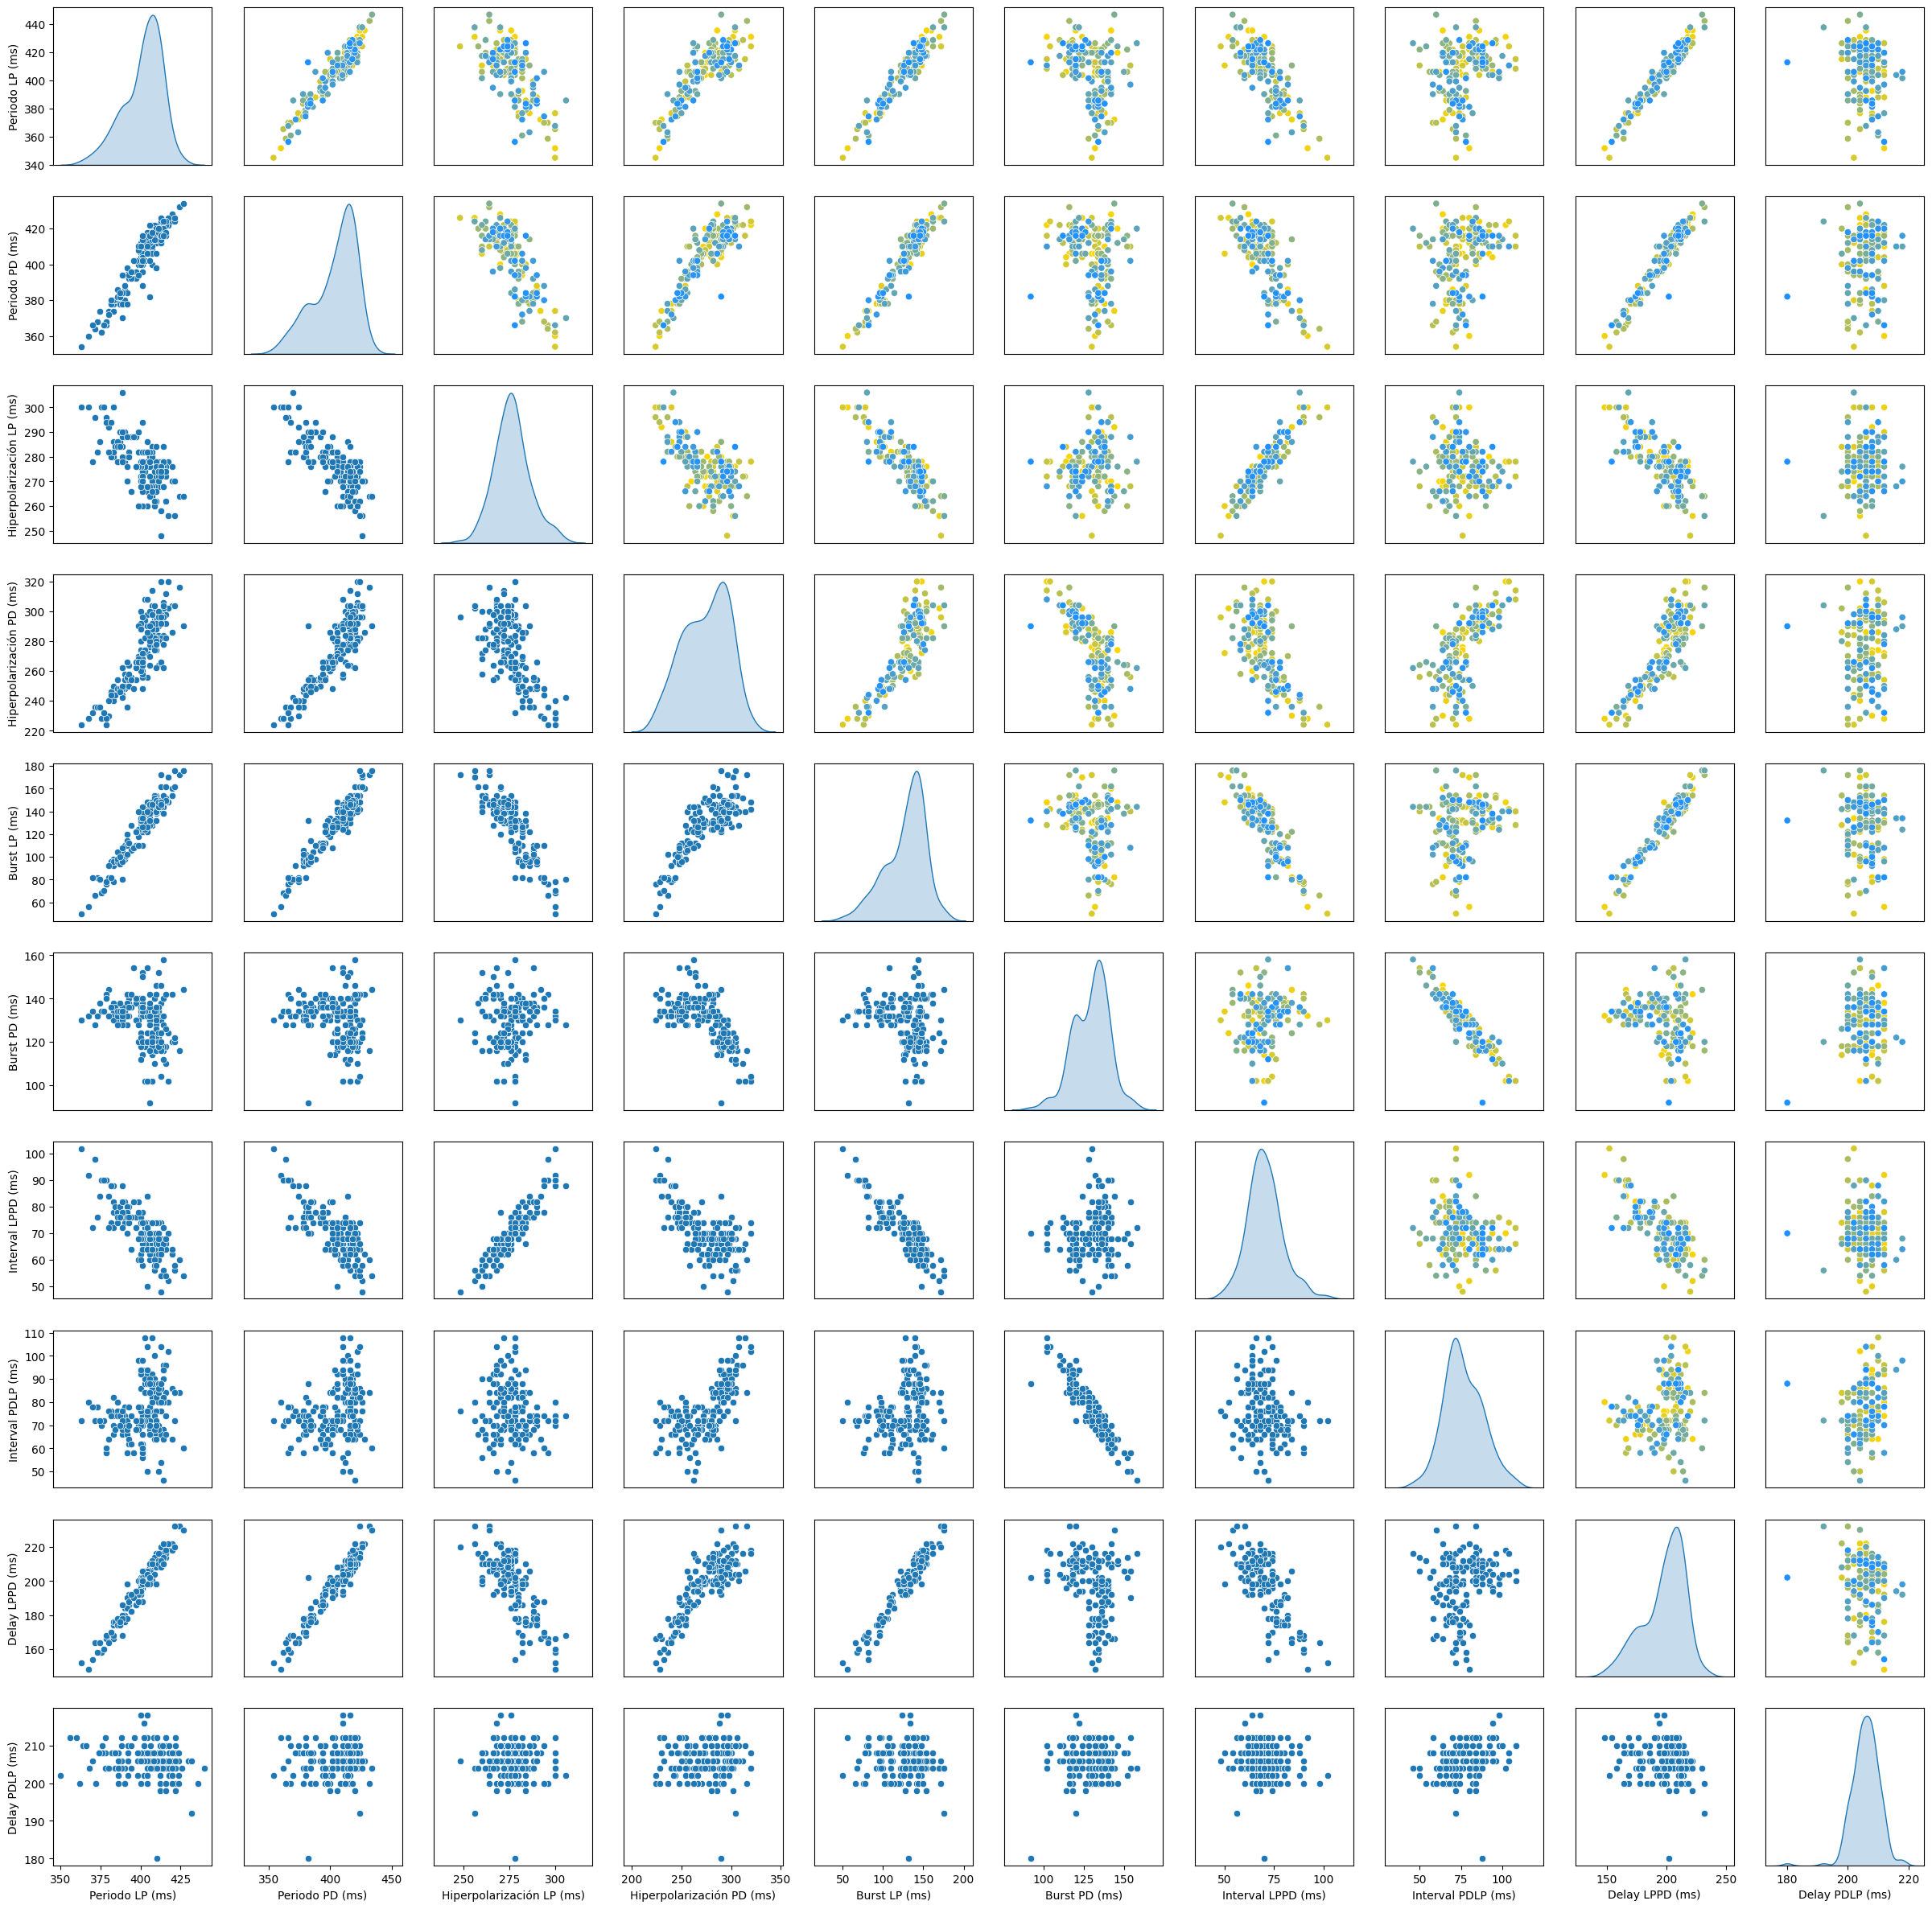

In [10]:
# sub5

campaign =  [0.2, 4, 0.2, 0.1, 4, 4.3, 400, 400, 400, 222]

if first_neuron=='PD':
        t_cut = campaign[-1]
elif first_neuron=='LP':
        t_cut = campaign[-2]

prominence_LP_1 = campaign[0]
prominence_LP_2 = campaign[1]
height_LP = campaign[2]
prominence_PD_1 = campaign[3]
prominence_PD_2 = campaign[4]
height_PD = campaign[5]
dist_LP = campaign[6]*t_cut
dist_PD = campaign[7]*t_cut

t, V_PD, V_LP, slices_PD, slices_LP, Intervals = Get_Intervals(Data, t_cut, first_neuron,prominence_LP_1, prominence_LP_2, prominence_PD_1, prominence_PD_2,height_LP, height_PD, dist_LP, dist_PD)
Interval_Pairplot(Intervals, diagonal_kind='kde', Evolution=True, Palette="blend:gold,dodgerblue", Cycle_by_cycle=True, hue="Normal")